Importing Libraries

In [ ]:
import numpy as np #Provides fast maths functions for calculations.
from sklearn import tree #Sklearn is a machine learning package which include a lot of ML algorithms.
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz #For visualization purpose
import graphviz #For visualization purpose

Function importing Dataset and Spliting the Dataset

In [ ]:
def load_data():
  
    #Get the data
    training_data = np.genfromtxt(r'Dataset.csv', delimiter=',', dtype=np.int32) 
#Once the file is defined and open for reading, genfromtxt splits each non-empty line into a sequence of strings. 
#Empty or commented lines are just skipped. The delimiter keyword is used to define how the splitting should take place.
#Bounds of a 32-bit integer
  
    inputs = training_data[:,:-1]         # Get the inputs - All rows and all columns except the last one 
   
    outputs = training_data[:,-1]         # Get the labels- All rows and last column

    #Spliting the Dataset
    # Divide the data set into training and testing. Total=2456
    #  Training dataset (1500 rows)
    #  Training dataset (956 rows)  
    training_inputs = inputs[:1500]       #  Select first 1500 rows (0-1499) excluding last column
    training_outputs = outputs[:1500]     #  Select first 1500 rows (0-1499) with only last column
    testing_inputs = inputs[1500:]        #  Select remaining rows (1500-2455) excluding last column
    testing_outputs = outputs[1500:]      #  Select remaining rows (1500-2455) with only last column

    # Return the four arrays
    return training_inputs, training_outputs, testing_inputs, testing_outputs

Main Function

In [ ]:
if __name__ == '__main__':        # Entry point of the program
    train_inputs, train_outputs, test_inputs, test_outputs = load_data()      # get  the data 

    classifier = tree.DecisionTreeClassifier()        # Create a decision tree classifier model using scikit-learn
  
    classifier.fit(train_inputs, train_outputs)       # Train the classifier model
    
    predictions = classifier.predict(test_inputs)      # make the predictions on testing data
    
    confusionmatrix=confusion_matrix(test_outputs,predictions)       # Create a confusion matrix 
   
    accuracy = 100.0 * accuracy_score(test_outputs, predictions)     # Calculate the accuracy
    print ("The accuracy of your decision tree on testing data is: " + str(round(accuracy,2))+ "%")
    print("\nConfusionmatrix=\n",confusionmatrix)
    
    error=(1-accuracy/100.0)*100.0                                   # Error
    print("\nThe error rate of the decision tree on testing data is: " + str(round(error,2)) + "%")
    
    report=classification_report(test_outputs,predictions)          #Report
    print("\nThe classification report is:\n\n "+ str(report))

The accuracy of your decision tree on testing data is: 82.85%

Confusionmatrix=
 [[413 121]
 [ 43 379]]

The error rate of the decision tree on testing data is: 17.15%

The classification report is:

               precision    recall  f1-score   support

          -1       0.91      0.77      0.83       534
           1       0.76      0.90      0.82       422

    accuracy                           0.83       956
   macro avg       0.83      0.84      0.83       956
weighted avg       0.84      0.83      0.83       956



Visualizing Decision Tree

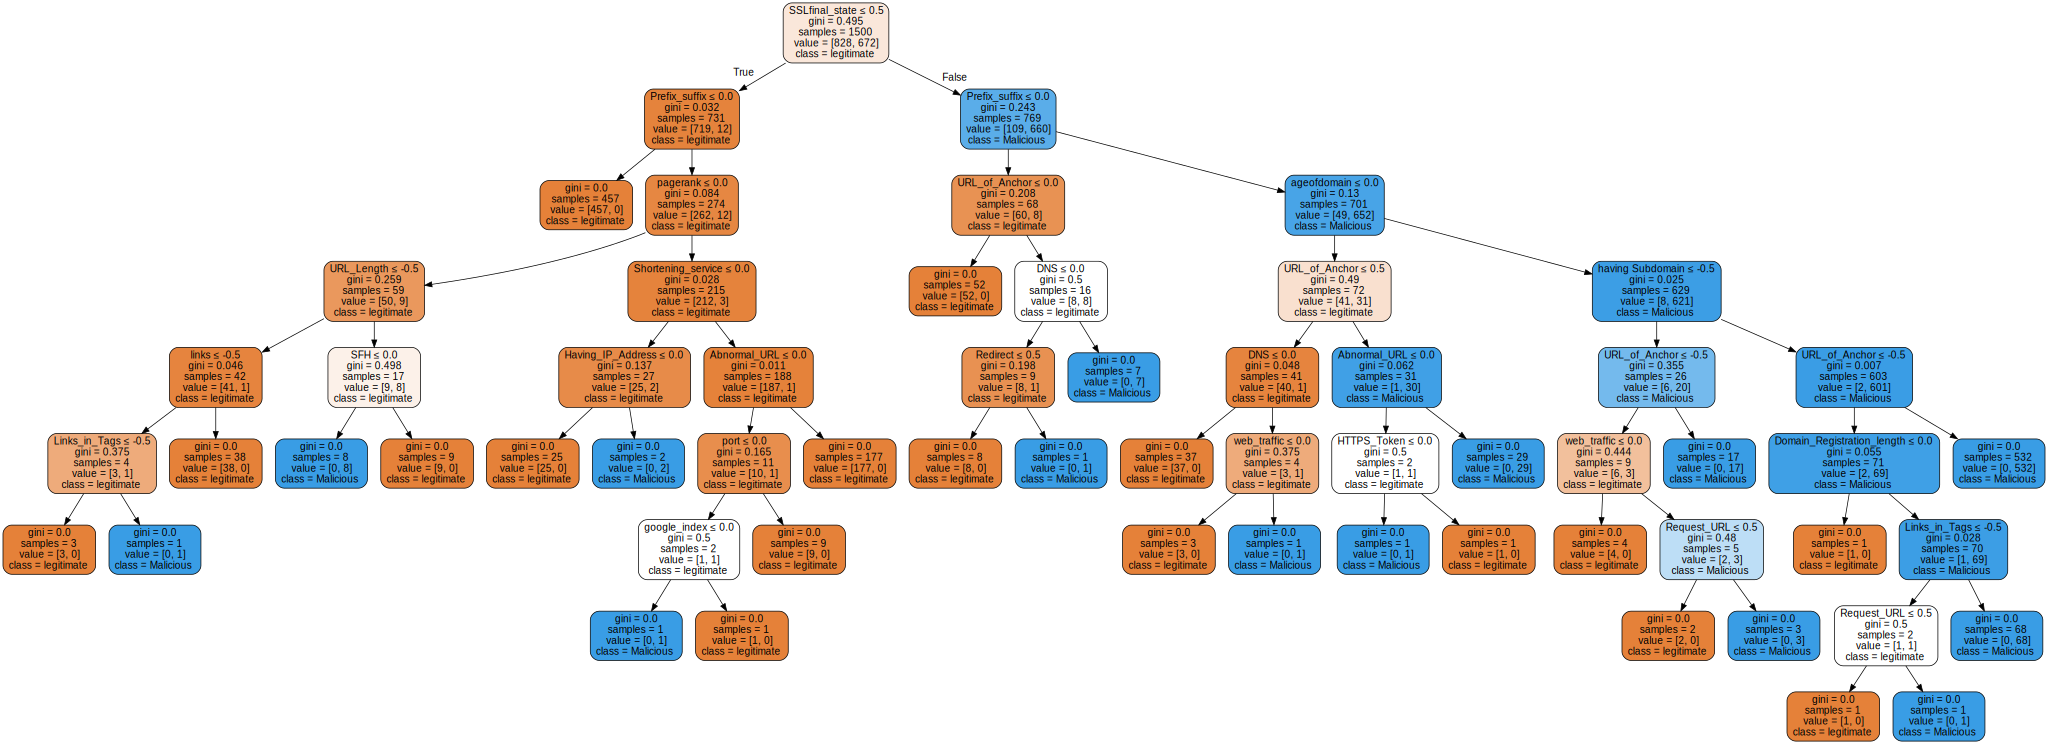

In [ ]:
dot_data = tree.export_graphviz(classifier, out_file=None,
                         feature_names=["Having_IP_Address","URL_Length","Shortening_service","@","//","Prefix_suffix",
                         "having Subdomain","SSLfinal_state", "Domain_Registration_length","favicon","port","HTTPS_Token","Request_URL",
                         "URL_of_Anchor","Links_in_Tags","SFH","Submitiing_to_email","Abnormal_URL","Redirect"," On_mouseover",
                         "Rightclick","popup","iframe","ageofdomain","DNS","web_traffic","pagerank",
                         "google_index","links","statistical_report"],class_names=["legitimate","Malicious"],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data, format="png") 
graph   #print graph 

Make image of the Decision Tree

In [ ]:
graph.render("DecisionTree_graphivz")

'DecisionTree_graphivz.png'